Problem Statement:

1. The system in focus is the Air Pressure System(APS) which generates pressurized air that are uilized in various functions in a tuck, such as braking and gear changes. The datasets positie class corresponds to component failures for components not related to the APS system.

2. The problem is to reduce the cost due to unnecessary repairs. So it is required to minimize the false predictions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
import statistics


In [2]:
dataset_link = "https://raw.githubusercontent.com/Afsaan/sensor_fault_detection/main/data/train.csv"

df = pd.read_csv(dataset_link, na_values ="na")
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2.926000e+03,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
36184,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
36185,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
36186,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [3]:
df.isnull().sum()

,0
class,0
aa_000,0
ab_000,27896
ac_000,2141
ad_000,9200
...,...
ee_007,379
ee_008,379
ee_009,379
ef_000,1730


In [4]:
df.shape # check no. of rows and columns

(36188, 171)

In [5]:
# check the unique values in a class
df['class'].value_counts()


,count
class,
neg,35188
pos,1000


#### the above results shows its an imbalanced **data**

#### next step to check how many are categorical and how many are numerical

In [6]:
# define numerical and categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f"we have {len(numeric_features)} numrical features : {numeric_features}")
print(f"we have {len(categorical_features)} categorical features : {categorical_features}")

we have 170 numrical features : ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000',

# if you have more than 70% of data missing from a column, then remove that column

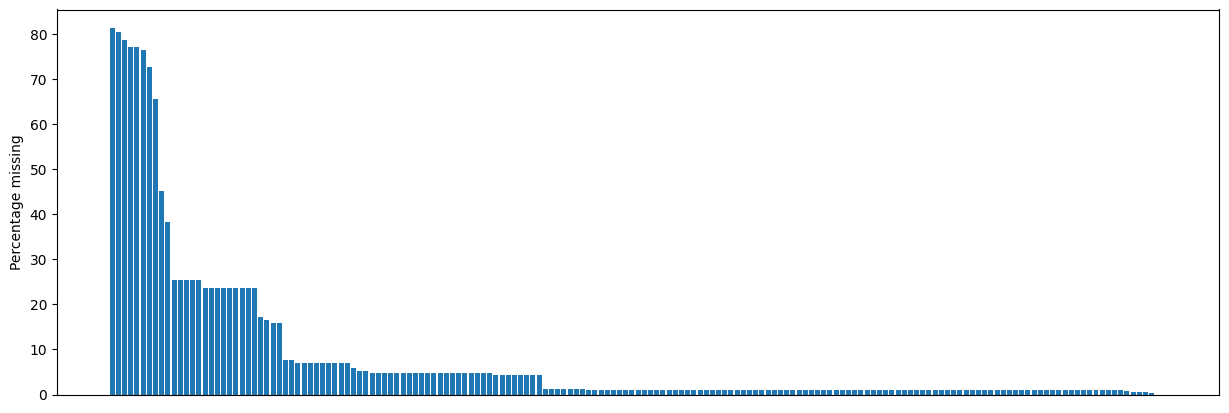

In [7]:
# check the missing values
# still below code is incomplete

fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)
ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [ ]:
missing.values.shape

(171, 1)

In [8]:
# count of total of missing values

df.isna().sum()

,0
class,0
aa_000,0
ab_000,27896
ac_000,2141
ad_000,9200
...,...
ee_007,379
ee_008,379
ee_009,379
ef_000,1730


In [9]:
# percentage of missing values

df.isna().sum().div(df.shape[0]).mul(100)


,0
class,0.000000
aa_000,0.000000
ab_000,77.086327
ac_000,5.916326
ad_000,25.422792
...,...
ee_007,1.047309
ee_008,1.047309
ee_009,1.047309
ef_000,4.780590


In [ ]:
df.isna().mean()

,0
class,0.000000
aa_000,0.000000
ab_000,0.770863
ac_000,0.059163
ad_000,0.254228
...,...
ee_007,0.010473
ee_008,0.010473
ee_009,0.010473
ef_000,0.047806


In [10]:
# converting to data frame of the pecentage values

df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
...,...
cj_000,0.560959
ci_000,0.560959
bt_000,0.237648
aa_000,0.000000


In [11]:
missing.index

Index(['br_000', 'bq_000', 'bp_000', 'ab_000', 'cr_000', 'bo_000', 'bn_000',
       'bm_000', 'bl_000', 'bk_000',
       ...
       'aq_000', 'ao_000', 'bj_000', 'by_000', 'ck_000', 'cj_000', 'ci_000',
       'bt_000', 'aa_000', 'class'],
      dtype='object', length=171)

In [ ]:
missing.values

array([[81.41096496],
       [80.50182381],
       [78.79407538],
       [77.08632696],
       [77.08632696],
       [76.53365757],
       [72.76168896],
       [65.51895656],
       [45.13927269],
       [38.19774511],
       [25.42279209],
       [25.42279209],
       [25.42279209],
       [25.42279209],
       [25.42279209],
       [23.54924284],
       [23.54924284],
       [23.54924284],
       [23.54924284],
       [23.54924284],
       [23.54924284],
       [23.54924284],
       [23.54924284],
       [23.54924284],
       [17.15762131],
       [16.5275782 ],
       [15.93069526],
       [15.93069526],
       [ 7.69039461],
       [ 7.59644081],
       [ 7.03548138],
       [ 7.03271803],
       [ 7.03271803],
       [ 7.03271803],
       [ 7.03271803],
       [ 7.02995468],
       [ 7.02995468],
       [ 7.02995468],
       [ 7.02719133],
       [ 5.91632585],
       [ 5.2365425 ],
       [ 5.23377915],
       [ 4.78611694],
       [ 4.78611694],
       [ 4.78611694],
       [ 4

In [ ]:
missing.values.shape

(171, 1)

In [ ]:
# we want 1 row 171 columns, hence we are doing transpose, to be form of a list

missing.values.T.shape

(1, 171)

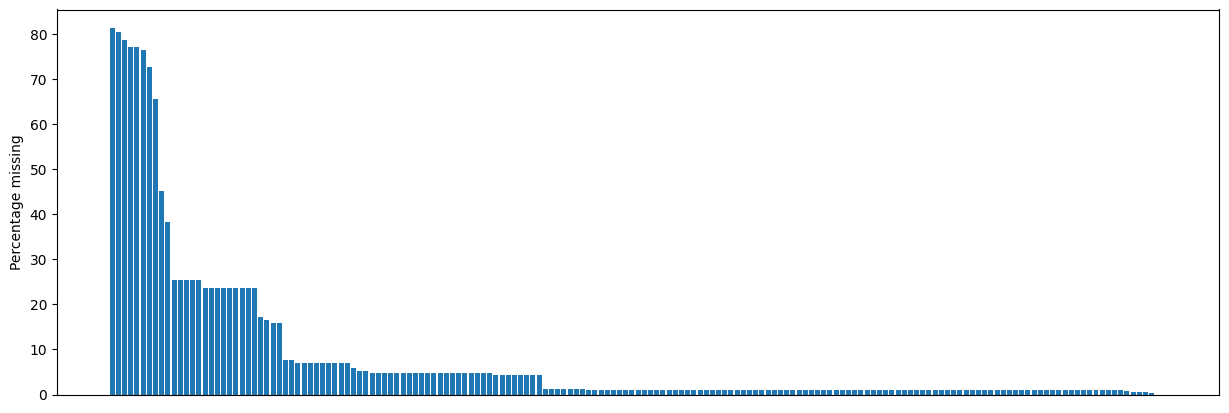

In [12]:
# check the missing values

fig, ax = plt.subplots(figsize=(15,5))
missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)
ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

from the above dataset, we need to remove the columns which has more than 70% data is missing

In [13]:
# dropping the columns which has more than 70% of missing values

dropcals =  missing[missing[0]>70]
dropcals

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


### we have to remove above columns

In [14]:
df.drop(dropcals.index, axis=1, inplace=True) # to make changes in the original data

In [ ]:
# check the rows and columns after removing missing data

df.shape

(36188, 164)

In [15]:
# first we need to do missing value count

missing_values_count = df.isnull().sum()
missing_values_count

,0
class,0
aa_000,0
ac_000,2141
ad_000,9200
ae_000,1587
...,...
ee_007,379
ee_008,379
ee_009,379
ef_000,1730


In [16]:
total_cells = np.product(df.shape)
total_cells

5934832

In [17]:
# total missing

total_missing = missing_values_count.sum()

In [18]:
# percentage of missing data in the entire dataset

print(f"Percentage of the total missing cells in the data : {(total_missing/total_cells)*100}")

Percentage of the total missing cells in the data : 5.37059852747306


In [ ]:
# plot the target variables to understand the pattern/data



We need to tackle missing 5.37 % data

Positive: 1000, Negative: 35188


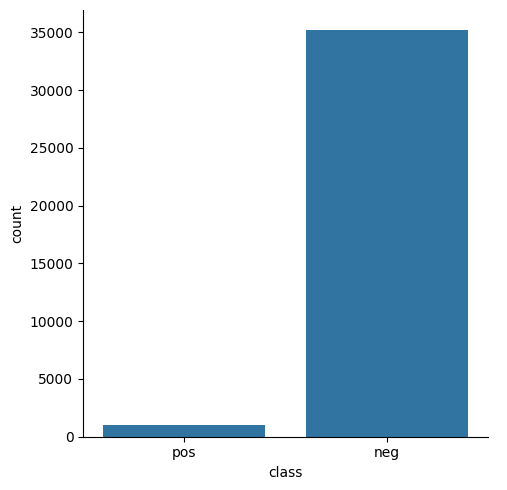

In [19]:
# plot the target variables to understand the pattern/data

# first we will try to get positive class

pos = df[df['class']=='pos'].shape[0]
neg = df[df['class']=='neg'].shape[0]
sns.catplot(data=df, x='class', kind='count')
print(f"Positive: {pos}, Negative: {neg}")

from above graph we can see data is imbalanced

# we have 2 problems

1. we have 5% missing values
2. we have highly imbalanced data

Solution for fixing highly imbalanced data

**Ex 1: oversampling or undersampling**


**So for our dataset we need to go with oversampling, because if we go with undersampling, lots of data will be lost**

Ex 2: Hybrid technique
SMOTE + TOMEK
It is a hybdird technique which will do both oversampling and undersampling for us

# Reading Task

1.   SMOTE + TOMEK
2.   KNN imputer
3.   Robust Scalar

# Evaluate model on different experiments

In [20]:
# splitting the data into x and y

X = df.drop('class', axis=1)
y = df['class']

In [21]:
ignore = ['UserWarning', 'FutureWarning']
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

In [22]:
# encoding the target variables

y = y.replace({'pos':1, 'neg':0})

# experiment 1 = KNN imputer for NULL values and RobustScaler for scaling

In [23]:
robust_scaler = RobustScaler()
X1 = robust_scaler.fit_transform(X)

observers n_neighbors = 3

In [24]:
knn_pipeline = Pipeline(steps = ('impute', KNNImputer(n_neighbors=3), ('RObust_scalar', RobustScaler())))

In [25]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from imblearn.combine import SMOTETomek

# Assuming X and y are your data and labels

# Scale the features using RobustScaler
robust_scaler = RobustScaler()
X1 = robust_scaler.fit_transform(X)

# Decide the optimal number of neighbors for imputation
results = []
for s in [1, 3, 5, 7]:
    pipeline = Pipeline(steps=[("imputer", KNNImputer(n_neighbors=s)), ('model', LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring="accuracy", cv=2, n_jobs=-1)
    results.append(scores)
    print(f"n_neighbors = {s} -> accuracy {np.mean(scores)}")






n_neighbors = 1 -> accuracy 0.7332817508566376
n_neighbors = 3 -> accuracy 0.7381728749861833
n_neighbors = 5 -> accuracy 0.7220349287056482
n_neighbors = 7 -> accuracy 0.7272576544710954


In [27]:
# Based on the results, choose the optimal n_neighbors
optimal_n_neighbors = 3  # Let's assume 3 is the optimal value based on the previous output

# Create a pipeline with the optimal number of neighbors
knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=optimal_n_neighbors)),
    ('scaler', RobustScaler())
])



In [28]:
# Transform the data using the pipeline
X_knn = knn_pipeline.fit_transform(X)

# Perform resampling using SMOTETomek
smt = SMOTETomek(random_state=101, sampling_strategy='minority', n_jobs=-1)
X_res, y_res = smt.fit_resample(X_knn, y)

# Now X_res and y_res contain the resampled data

In [29]:
# initalize default model in a dict

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {"Random Forest": RandomForestClassifier(), "Decision tree" : DecisionTreeClassifier(), "svm": SVC(), "xgb": XGBClassifier(), "boost": AdaBoostClassifier()}

In [30]:
# code for importing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [31]:
# code to evaluate classification

def evaluate_clf(true, predicted):

  acc = accuracy_score(true, predicted)  # calculate accuracy
  f1 = f1_score(true, predicted) # calculate f1
  precision = precision_score(true, predicted)  # calculate precision
  recall = recall_score(true, predicted) # calculate recall
  roc_auc = roc_auc_score(true, predicted) # calculate roc auc

  return acc, f1, precision, recall, roc_auc

In [32]:
# code for cost function

def total_cost(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, ypred)

# 2 scenarios

1. model - error with something
ac - APS
so this is false negative

2. model - error with APS
ac - something
so this is false positive

in this model, false positive is more important

In [33]:
# function to call the cost of the models

def total_cost(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, ypred)
  cost = 10*fp + 500*fn
  return cost

In [35]:
# create a function that will evaluate models and returns a report---important



def evaluate_models(X, y, models):
  # separate dataset into train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

  cost_list = []

  for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    cost_list.append(mean_squared_error(y_test, predictions))


  models_list = []

  for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # train model

    # make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # training set performance
    model_train_acc, model_train_f1, model_train_pre, model_train_recall, model_train_curve = evaluate_clf(y_train, y_train_pred)
    train_cost = total_cost(y_train, y_train_pred)

    # test set performance
    model_test_acc, model_test_f1, model_test_pre, model_test_recall, model_test_curve = evaluate_clf(y_test, y_test_pred)
    train_cost = total_cost(y_test, y_test_pred)

    print('=+'*50)
    print(list(model.values())[i])
    models_list.append(list(models.values())[i])

    print('Model performance training set')
    print(f'Accuracy {model_train_acc}')
    print(f"f1 score {model_train_f1}")
    print(f'precision {model_train_pre}')
    print(f"recall {model_train_recall}")
    print(f'roc auc {model_train_curve}')
    print(f"total cost {train_cost}")

    print('-'*50)

    print('model performance test set')
    print(f"Accuracy {model_test_acc}")
    print(f"f1 score {model_test_f1}")
    print(f"precision {model_test_pre}")
    print(f'recall {model_test_recall}')
    print(f"roc auc {model_test_curve}")
    print(f'total cost {test_cost}')
    print('\n')

    cost_list.append(test_cost)

  report = pd.DataFrame(list(zip(models_list, cost_list)), columns = ["model Name", "cost"]).sort_values(by=["cost"])


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming you have some data for training (X and y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Handle missing values in X
imputer = SimpleImputer(strategy='mean')  # You can change the strategy ('mean', 'median', 'most_frequent', etc.)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create model objects before using them in the list
knn = KNeighborsClassifier()
linear_regression = LinearRegression()

# Now you can use these models in the list
models = [knn, linear_regression]

def evaluate_models(X_train, X_test, y_train, y_test, models):
    reports = {}

    for i, model in enumerate(models):
        model.fit(X_train, y_train)  # Train the model
        predictions = model.predict(X_test)  # Make predictions

        # Assuming you want to calculate Mean Squared Error for the regression model
        if isinstance(model, LinearRegression):
            mse = mean_squared_error(y_test, predictions)
            reports[f"Model {i} (Linear Regression)"] = mse
        else:
            accuracy = model.score(X_test, y_test)
            reports[f"Model {i} (KNN)"] = accuracy

    return reports

# Evaluate models
report_knn = evaluate_models(X_train, X_test, y_train, y_test, models)
print(report_knn)




{'Model 0 (KNN)': 0.9802431610942249, 'Model 1 (Linear Regression)': 0.01561409327421865}


# Experiment 2- Mean imputer

In [37]:
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from imblearn.combine import SMOTETomek
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

In [38]:

# Assuming X and y are already defined (X is the features matrix and y is the target variable)
# Define the pipeline for imputing missing values and scaling
mean_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="mean")),
    ('Robust_scalar', RobustScaler())
])

# Fit and transform X using the pipeline (fill missing values and scale)
X_mean = mean_pipeline.fit_transform(X)

# Balancing the dataset using SMOTETomek
smt = SMOTETomek(random_state=101, sampling_strategy='minority', n_jobs=-1)
X_res, y_res = smt.fit_resample(X_mean, y)

# Define the models to evaluate
knn = KNeighborsClassifier()
linear_regression = LinearRegression()
models = [knn, linear_regression]

# Define the evaluate_models function
def evaluate_models(X_train, y_train, models):
    reports = {}

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=101)

    for i, model in enumerate(models):
        model.fit(X_train, y_train)  # Train the model
        predictions = model.predict(X_test)  # Make predictions

        # Assuming you want to calculate Mean Squared Error for the regression model
        if isinstance(model, LinearRegression):
            mse = mean_squared_error(y_test, predictions)
            reports[f"Model {i} (Linear Regression)"] = mse
        else:
            accuracy = model.score(X_test, y_test)  # For classifiers, use accuracy
            reports[f"Model {i} (KNN)"] = accuracy

    return reports

# Evaluate models on the resampled data
report_mean = evaluate_models(X_res, y_res, models)
print(report_mean)


{'Model 0 (KNN)': 0.9727823298895618, 'Model 1 (Linear Regression)': 0.15587772920797494}


In [39]:
import warnings
warnings.filterwarnings("ignore")

mean_pipeline = Pipeline(steps = [("impute", SimpleImputer(strategy="mean")), ('Robust_scalar', RobustScaler())])

X_mean = mean_pipeline.fit_transform(X)

smt = SMOTETomek(random_state=101, sampling_strategy='minority', n_jobs=-1)
X_res, y_res = smt.fit_resample(X_mean, y)

report_mean = evaluate_models(X_res, y_res, models)
print(report_mean)

{'Model 0 (KNN)': 0.9727823298895618, 'Model 1 (Linear Regression)': 0.15587772920797494}


# Experiment 3- Median imputer

In [40]:
def evaluate_models(X, y, models):
    reports = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    for i, model in enumerate(models): # Directly iterate through the models list using enumerate
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        if isinstance(model, LinearRegression):
            reports[f"Model {i} (Linear Regression)"] = mean_squared_error(y_test, predictions)
        else:
            reports[f"Model {i} (KNN)"] = model.score(X_test, y_test)
    return reports

# experiment 4 - constant imputer

In [41]:
import warnings
warnings.filterwarnings("ignore")

constant_pipeline = Pipeline(steps = [("impute", SimpleImputer(strategy="constant", fill_value=0)), ('Robust_scalar', RobustScaler())])

X_constant = constant_pipeline.fit_transform(X)

smt = SMOTETomek(random_state=101, sampling_strategy='minority', n_jobs=-1)
# Use X_constant instead of X_median
X_res, y_res = smt.fit_resample(X_constant, y)

report_constant = evaluate_models(X_res, y_res, models)

In [42]:
# experiment 5 = PCA - important for large dataset

from sklearn.decomposition import PCA

pca_pipeline = Pipeline(steps = [("impute", SimpleImputer(strategy="median")), ("Robust_scalar", RobustScaler())])

x_pca = pca_pipeline.fit_transform(X)


In [ ]:
# to find how many rows are best for PCA
# Use of Elbow Curve below

In [43]:
var_ratio = {}
for n in range(2,150):
  pc = PCA(n_components = n)
  df_pca = pc.fit(x_pca)
  var_ratio[n] = sum(df_pca.explained_variance_ratio_)

In [44]:
var_ratio

{2: 0.9992298293315861,
 3: 0.9994359376999231,
 4: 0.9995607111949607,
 5: 0.9996470138129663,
 6: 0.9997283278007664,
 7: 0.9997863989886615,
 8: 0.999840994250882,
 9: 0.9998833399986884,
 10: 0.9999218973880322,
 11: 0.9999435708357678,
 12: 0.9999596947338418,
 13: 0.9999685841181187,
 14: 0.9999751754215925,
 15: 0.9999807327150376,
 16: 0.9999860398774784,
 17: 0.9999891489906082,
 18: 0.9999913702671959,
 19: 0.999993342601462,
 20: 0.9999951833104674,
 21: 0.9999965863409553,
 22: 0.9999976015670349,
 23: 0.9999983859889054,
 24: 0.9999988350884725,
 25: 0.9999992340756385,
 26: 0.9999995477699425,
 27: 0.9999997326428127,
 28: 0.9999998818637958,
 29: 0.9999999137249355,
 30: 0.9999999448368756,
 31: 0.9999999657253258,
 32: 0.9999999860835925,
 33: 0.9999999925306322,
 34: 0.9999999954639561,
 35: 0.999999997495998,
 36: 0.9999999986080981,
 37: 0.9999999991643722,
 38: 0.9999999994546404,
 39: 0.9999999996921342,
 40: 0.9999999998211418,
 41: 0.9999999999302818,
 42: 0.9999

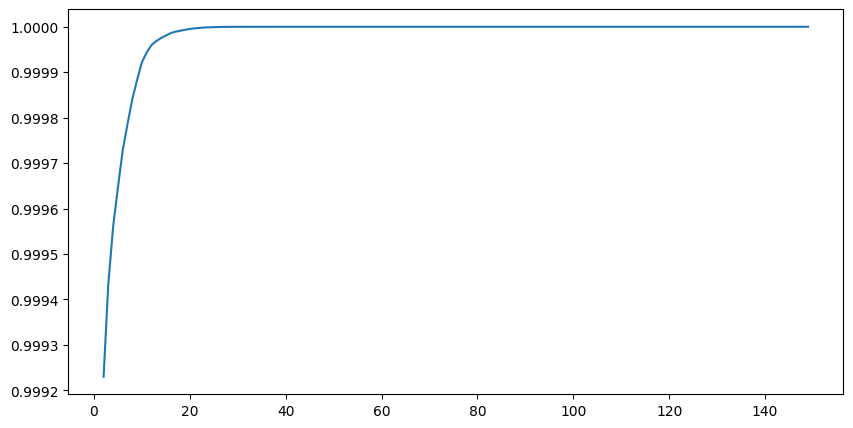

In [45]:
pd.Series(var_ratio).plot(figsize=(10,5))
plt.show()

In [46]:
!pip install kneed # Install the kneed module

<Figure size 600x600 with 0 Axes>

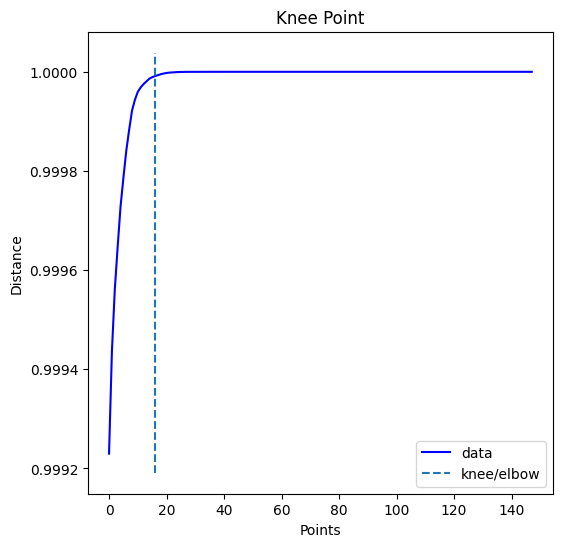

knee locator k at = 18


In [47]:
from kneed import KneeLocator
import numpy as np
import matplotlib.pyplot as plt

i = np.arange(len(var_ratio))
variance_ratio = list(var_ratio.values())
components = list(var_ratio.keys())

# Attempt to fit a lower degree polynomial or use 'linear' interpolation
knee = KneeLocator(i, variance_ratio, curve='concave', interp_method='polynomial')

fig = plt.figure(figsize=(6,6))
knee.plot_knee()
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

k = components[knee.knee]
print(f"knee locator k at = {k}")

In [51]:
# reducing the dimension of the data

pca_final = PCA(n_components=16)

# Fit the PCA model to the data first
pca_final.fit(x_pca)

# Now apply the transformation
reduced = pca_final.transform(x_pca) # Apply the PCA transformation to reduce dimensionality

In [52]:
reduced.shape

(36188, 16)

In [56]:
smt = SMOTETomek(random_state = 101, sampling_strategy="minority", n_jobs=-1)
X_res, y_res = smt.fit_resample(reduced, y)

In [58]:
# training all models
report_pca = evaluate_models(X_res, y_res, models)

In [59]:
report_pca

{'Model 0 (KNN)': 0.9605225380419179,
 'Model 1 (Linear Regression)': 0.17359797742181324}

In [60]:
report_mean

{'Model 0 (KNN)': 0.9727823298895618,
 'Model 1 (Linear Regression)': 0.15587772920797494}

In [61]:
from prettytable import PrettyTable

pt=PrettyTable()
pt.field_names= ["Model", "Imputation_method", "Total_cost"]
pt.add_row(["XGBClassifier", "Simple Imputer-Constant", "2950"])
pt.add_row(["XGBClassifier", "Knn-Imputer", "4460"])
pt.add_row(["XGBClassifier", "Mean-Imputer", "4460"])
pt.add_row(["XGBClassifier", "Simple Imputer-Mean", "4950"])
pt.add_row(["CatBoostClasifier", "Median", "5760"])
pt.add_row(["Random Forest", "PCA", "34150"])
print(pt)

+-------------------+-------------------------+------------+
|       Model       |    Imputation_method    | Total_cost |
+-------------------+-------------------------+------------+
|   XGBClassifier   | Simple Imputer-Constant |    2950    |
|   XGBClassifier   |       Knn-Imputer       |    4460    |
|   XGBClassifier   |       Mean-Imputer      |    4460    |
|   XGBClassifier   |   Simple Imputer-Mean   |    4950    |
| CatBoostClasifier |          Median         |    5760    |
|   Random Forest   |           PCA           |   34150    |
+-------------------+-------------------------+------------+


# methods

1. Constant Imputer
2. RObust scaler
3. Fix imbalance data -> Smotetomek
4. xgboost
5. testing accuracy - cost
6. confusion matrix
7. save the model
8. Prod